### Importing Packages

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

### Loading Files

In [4]:


# Load the CSV files
suppliers_df = pd.read_csv("../data/Suppliers.csv")
customers_df = pd.read_csv("../data/Customers.csv")
products_df = pd.read_csv("../data/Products.csv")
inventory_df = pd.read_csv("../data/Inventory.csv")
orders_df = pd.read_csv("../data/Orders.csv")
order_line_df = pd.read_csv("../data/Order_Line.csv")
sales_df = pd.read_csv("../data/Sales.csv")


### Check for missing values in each DataFrame

In [ ]:
# Check for missing values in each DataFrame
print(suppliers_df.isnull().sum())
print(customers_df.isnull().sum())
print(products_df.isnull().sum())


suppliers_df.dropna(inplace=True)


orders_df['Total_Amount'].fillna(0, inplace=True)


### Dropping Duplicated Data

In [ ]:

suppliers_df.drop_duplicates(inplace=True)
customers_df.drop_duplicates(inplace=True)
products_df.drop_duplicates(inplace=True)


### Check for missing values in each DataFrame

In [5]:
# Convert date columns to datetime format
inventory_df['Last_Restocked'] = pd.to_datetime(inventory_df['Last_Restocked'])
inventory_df['Last_Checked'] = pd.to_datetime(inventory_df['Last_Checked'])
orders_df['Order_Date'] = pd.to_datetime(orders_df['Order_Date'])
sales_df['Sale_Date'] = pd.to_datetime(sales_df['Sale_Date'])


### Merging Datasets For data analysis

In [6]:
# Merge Orders with Order_Line
orders_with_details = pd.merge(orders_df, order_line_df, on='Order_ID')

# Merge Orders with Customers for customer insights
orders_customers = pd.merge(orders_with_details, customers_df, on='Customer_ID')

# Merge Sales with Products
sales_with_products = pd.merge(sales_df, products_df, on='Product_ID')


---

## Data Visualization

#### 1- Sales Trending Over Time

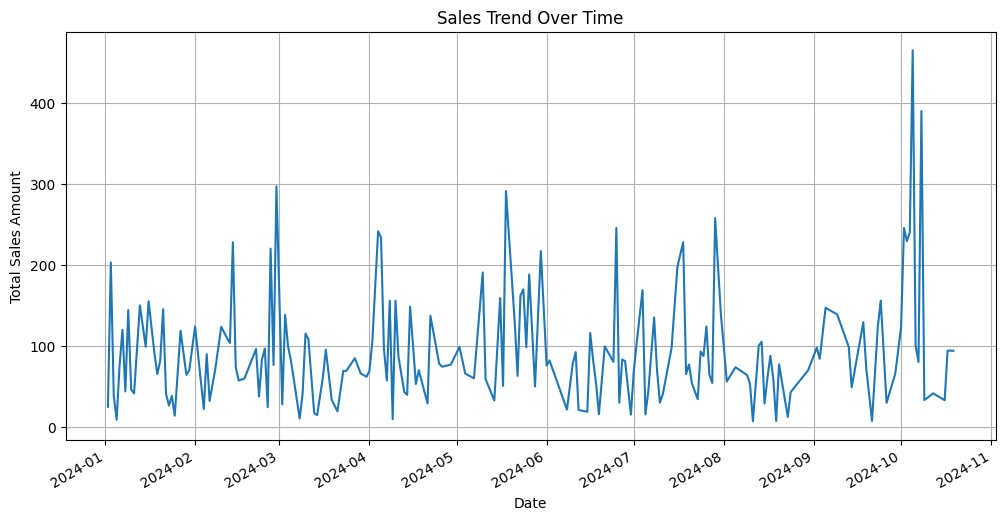

In [5]:
plt.figure(figsize=(12, 6))
sales_df.groupby('Sale_Date')['Sale_Amount'].sum().plot()
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()


In [1]:
import seaborn as sns

#### 2- Total Sales by Product Category

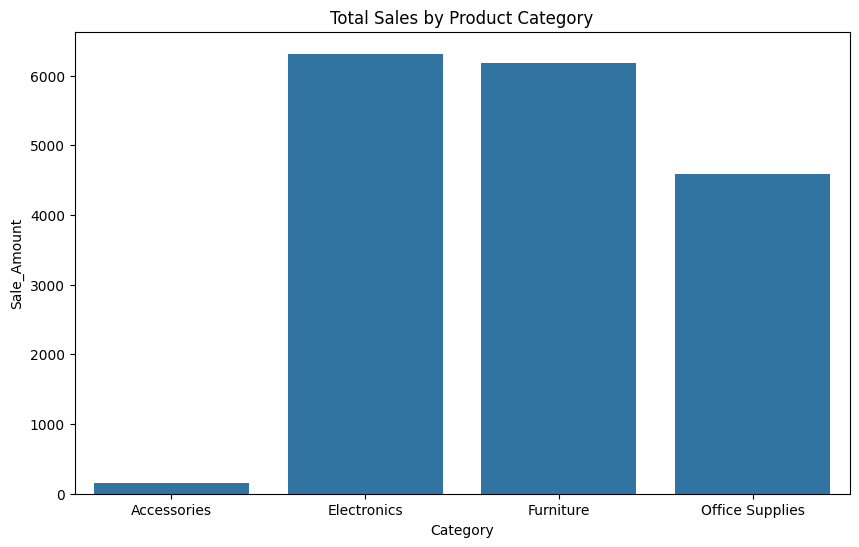

In [11]:
sales_with_products = pd.merge(sales_df, products_df, on='Product_ID')
category_sales = sales_with_products.groupby('Category')['Sale_Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x='Category', y='Sale_Amount', errorbar=None)
plt.title('Total Sales by Product Category')
plt.show()


#### 3- Distribution of Customer Order Frequency

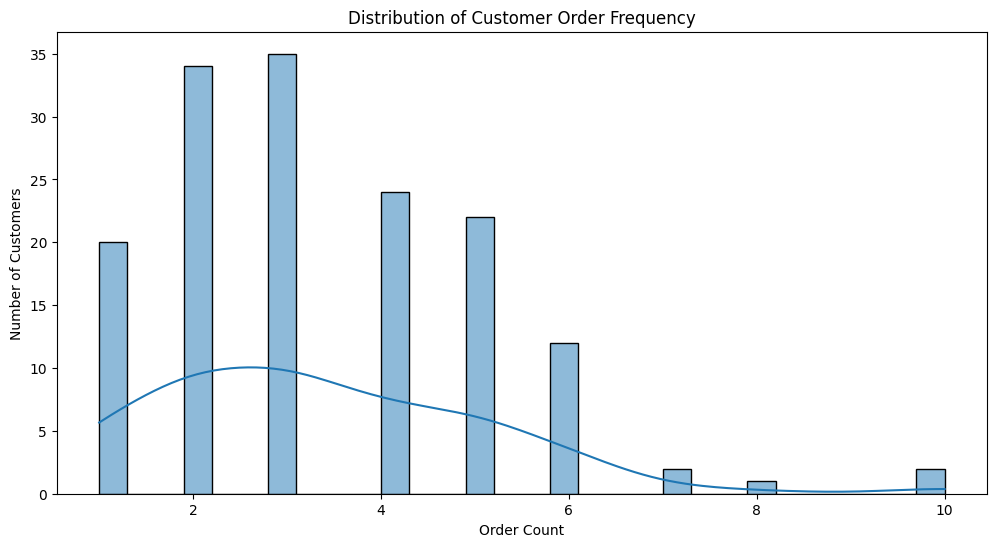

In [8]:
order_counts = orders_df['Customer_ID'].value_counts().reset_index()
order_counts.columns = ['Customer_ID', 'Order_Count']

plt.figure(figsize=(12, 6))
sns.histplot(order_counts['Order_Count'], bins=30, kde=True)
plt.title('Distribution of Customer Order Frequency')
plt.xlabel('Order Count')
plt.ylabel('Number of Customers')
plt.show()


#### 4- Top 10 Products by Sales Amount

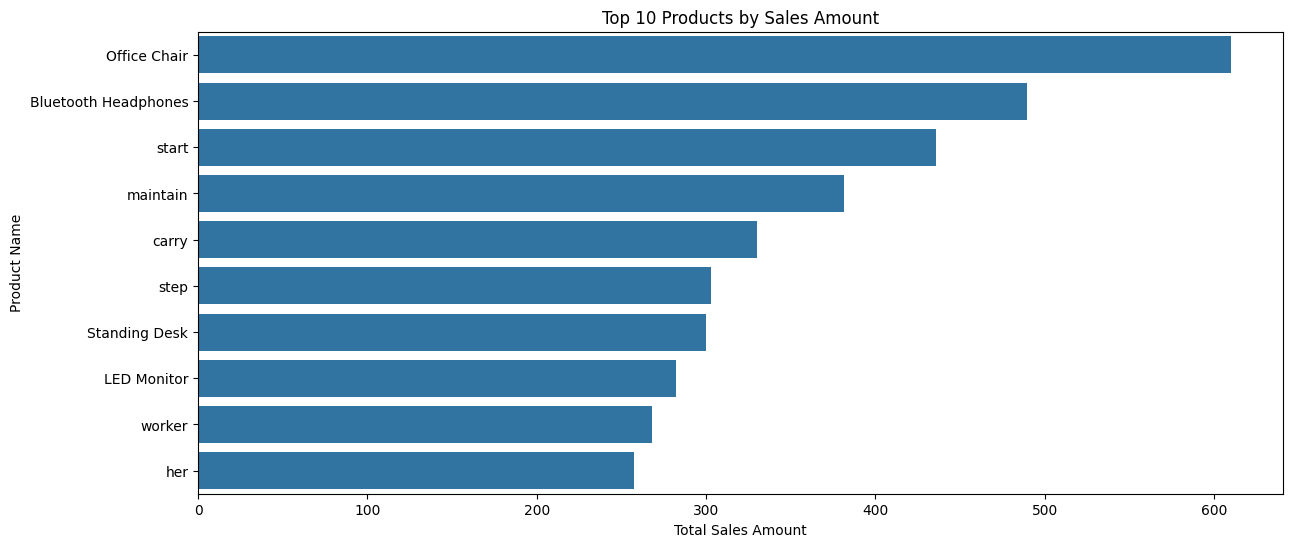

In [10]:
top_products = sales_with_products.groupby('Product_Name')['Sale_Amount'].sum().nlargest(10).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=top_products, x='Sale_Amount', y='Product_Name', errorbar=None)
plt.title('Top 10 Products by Sales Amount')
plt.xlabel('Total Sales Amount')
plt.ylabel('Product Name')
plt.show()


#### 5- Distribution of Payment Methods

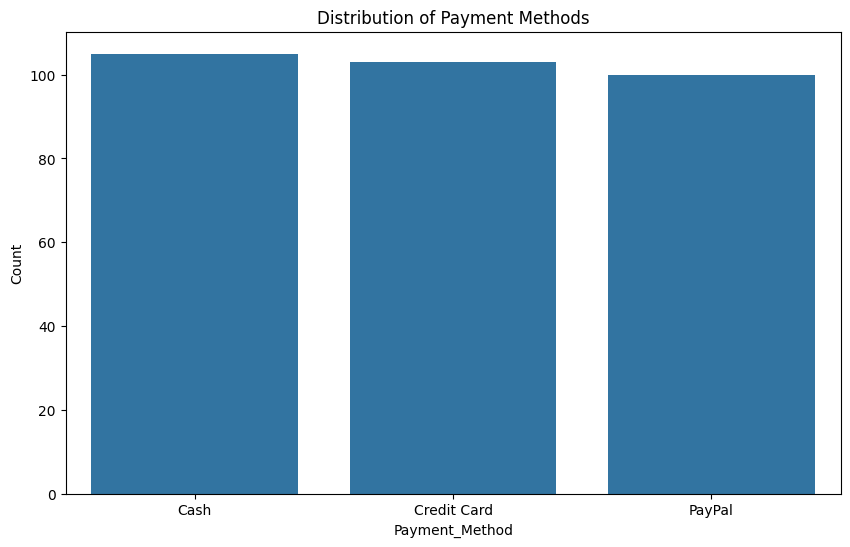

In [14]:
payment_counts = sales_df['Payment_Method'].value_counts().reset_index()
payment_counts.columns = ['Payment_Method', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=payment_counts, x='Payment_Method', y='Count', errorbar=None)
plt.title('Distribution of Payment Methods')
plt.show()


#### 6- Stock Quantity by Product Category

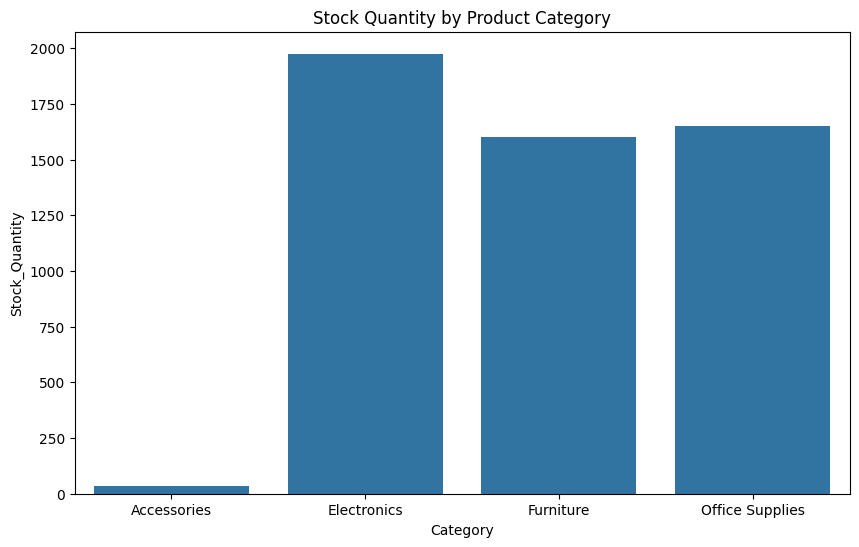

In [30]:
inventory_with_products = pd.merge(inventory_df, products_df, on='Product_ID')
category_inventory = inventory_with_products.groupby('Category')['Stock_Quantity'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_inventory, x='Category', y='Stock_Quantity', errorbar=None)
plt.title('Stock Quantity by Product Category')
plt.show()


#### 7- Heatmap of Product Quantities in Orders

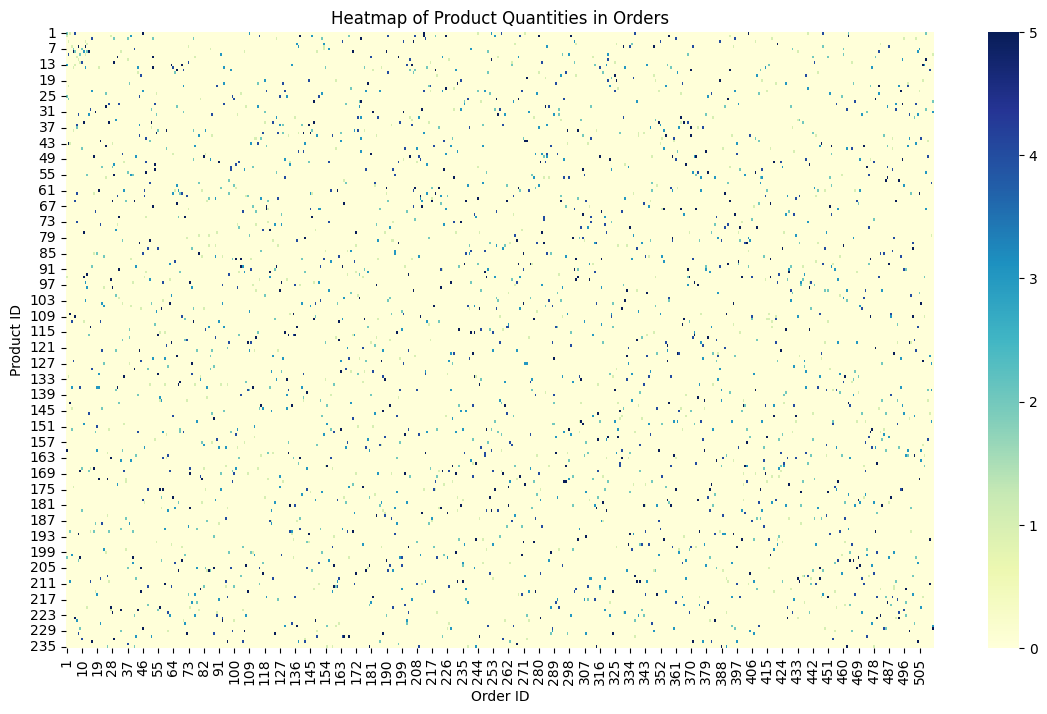

In [16]:
pivot_table = order_line_df.pivot_table(values='Quantity', index='Product_ID', columns='Order_ID', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', cbar=True)
plt.title('Heatmap of Product Quantities in Orders')
plt.xlabel('Order ID')
plt.ylabel('Product ID')
plt.show()


#### 8- Monthly Sales Trend

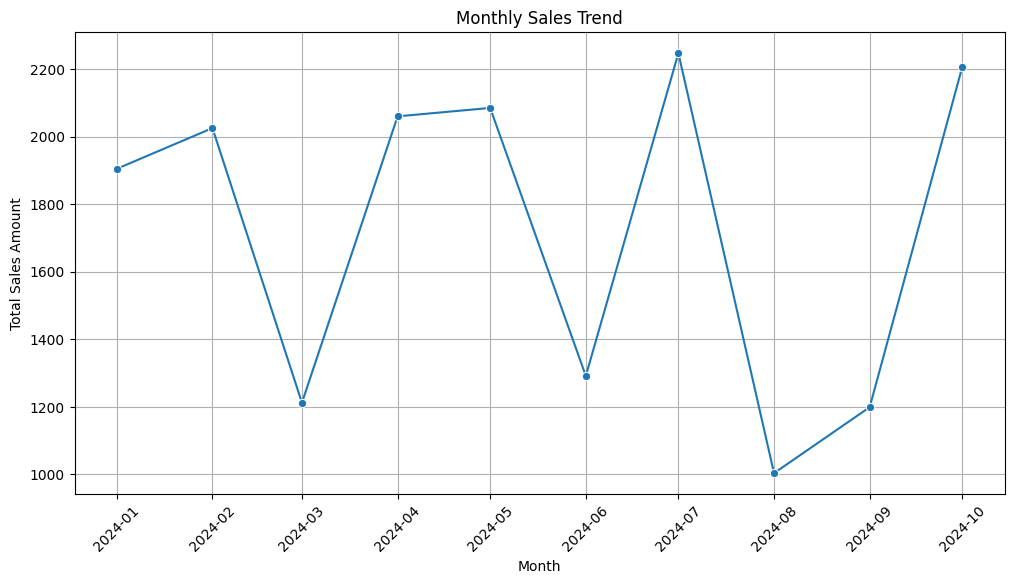

In [23]:
sales_df['Month'] = pd.to_datetime(sales_df['Sale_Date']).dt.to_period('M')


monthly_sales = sales_df.groupby('Month')['Sale_Amount'].sum().reset_index()


monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sale_Amount', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.ylabel('Total Sales Amount')
plt.xlabel('Month')
plt.grid(True)
plt.show()


#### 9- Top 10 Customers by Sales Amount

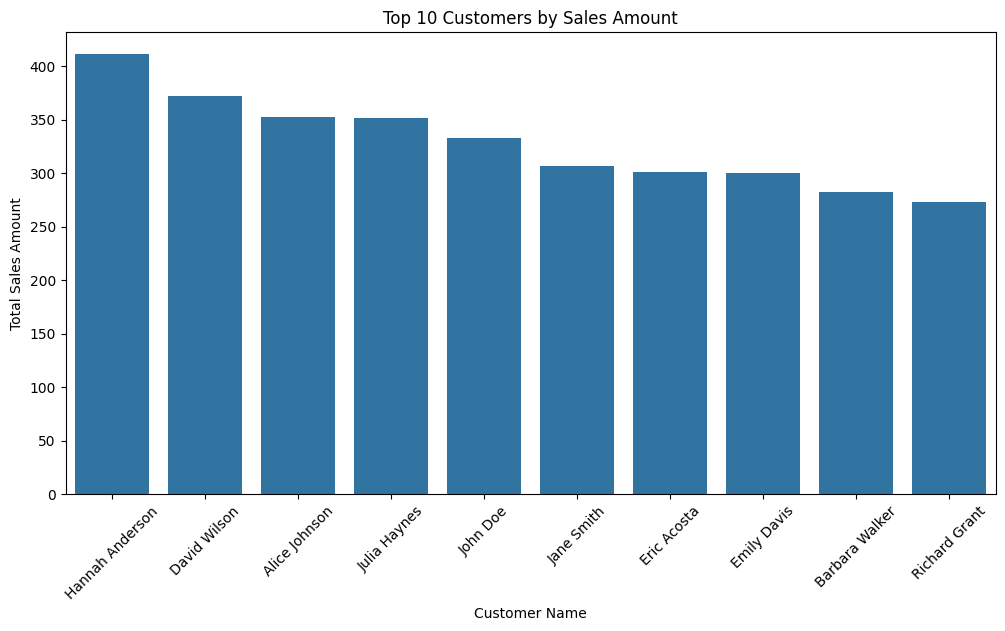

In [27]:
sales_with_names = sales_with_products.merge(customers_df[['Customer_ID', 'Customer_Name']], on='Customer_ID', how='left')

customer_sales = sales_with_names.groupby('Customer_Name')['Sale_Amount'].sum().nlargest(10).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_sales, x='Customer_Name', y='Sale_Amount', errorbar=None)
plt.title('Top 10 Customers by Sales Amount')
plt.xticks(rotation=45)  
plt.xlabel('Customer Name')
plt.ylabel('Total Sales Amount')
plt.show()

#### 10 - Order Status Distribution

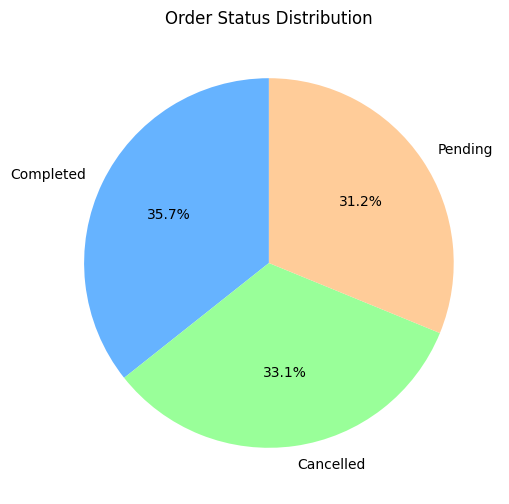

In [29]:
order_status_counts = orders_df['Status'].value_counts()

plt.figure(figsize=(8, 6))
order_status_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Order Status Distribution')
plt.ylabel('')  # Remove y-axis label
plt.show()
